In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **GDP**

![title](gdp.png)

In [2]:
gdp = pd.read_csv('gdp-per-person-employed-constant-ppp.csv')

In [3]:
gdp.head()

,Entity,Code,Year,GDP per person employed (constant 2017 PPP $)
0,Afghanistan,AFG,2002,5935.4070
1,Afghanistan,AFG,2003,5983.3994
2,Afghanistan,AFG,2004,5819.8170
3,Afghanistan,AFG,2005,6197.0400
4,Afghanistan,AFG,2006,6224.2710


In [5]:
informal = pd.read_csv('informal-employment-of-total-non-agricultural-employment.csv')

In [6]:
informal.Entity.nunique()

135

In [7]:
informal.head()

,Entity,Code,Year,"8.3.1 - Proportion of informal employment, by sector and sex (ILO harmonized estimates) - 13th ICLS (%) - SL_ISV_IFEM - Non-agriculture - Both sexes"
0,Afghanistan,AFG,2021,82.43
1,Angola,AGO,2004,68.22
2,Angola,AGO,2011,68.10
3,Argentina,ARG,2004,59.77
4,Argentina,ARG,2005,58.20


In [8]:
data_joined = pd.merge(gdp, informal, on=['Entity', 'Year'])

In [9]:
data_joined.Entity.nunique()

129

In [10]:
data_joined.Year.max()

np.int64(2022)

In [11]:
# Group by 'Country' and get the last year for each country
last_years = data_joined.groupby('Entity')['Year'].max().reset_index()

# Merge this information back to your original data to filter only the rows with the last year for each country
data_filtered = pd.merge(data_joined, last_years, on=['Entity', 'Year'])

# Reset index if needed
data_filtered = data_filtered.reset_index(drop=True)

In [12]:
data_filtered

,Entity,Code_x,Year,GDP per person employed (constant 2017 PPP $),Code_y,"8.3.1 - Proportion of informal employment, by sector and sex (ILO harmonized estimates) - 13th ICLS (%) - SL_ISV_IFEM - Non-agriculture - Both sexes"
0,Afghanistan,AFG,2021,7390.7026,AFG,82.43
1,Angola,AGO,2011,21949.7520,AGO,68.10
2,Argentina,ARG,2021,51161.3900,ARG,48.96
3,Armenia,ARM,2020,30737.3830,ARM,19.90
4,Australia,AUS,2020,98186.6500,AUS,24.57
...,...,...,...,...,...,...
124,Uruguay,URY,2020,50109.8320,URY,21.27
125,Vanuatu,VUT,2019,7797.6610,VUT,50.45
126,Vietnam,VNM,2021,19281.7050,VNM,60.10
127,Zambia,ZMB,2021,10166.1110,ZMB,70.43


In [13]:
data_filtered_renamed = data_filtered.rename(columns={'GDP per person employed (constant 2017 PPP $)': 'GDP', '8.3.1 - Proportion of informal employment, by sector and sex (ILO harmonized estimates) - 13th ICLS (%) - SL_ISV_IFEM - Non-agriculture - Both sexes':'Informal_employment'})

In [14]:
data_filtered_renamed.head()

,Entity,Code_x,Year,GDP,Code_y,Informal_employment
0,Afghanistan,AFG,2021,7390.7026,AFG,82.43
1,Angola,AGO,2011,21949.7520,AGO,68.10
2,Argentina,ARG,2021,51161.3900,ARG,48.96
3,Armenia,ARM,2020,30737.3830,ARM,19.90
4,Australia,AUS,2020,98186.6500,AUS,24.57


In [15]:
data_filtered_renamed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Entity               129 non-null    object 
 1   Code_x               129 non-null    object 
 2   Year                 129 non-null    int64  
 3   GDP                  129 non-null    float64
 4   Code_y               129 non-null    object 
 5   Informal_employment  129 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 6.2+ KB


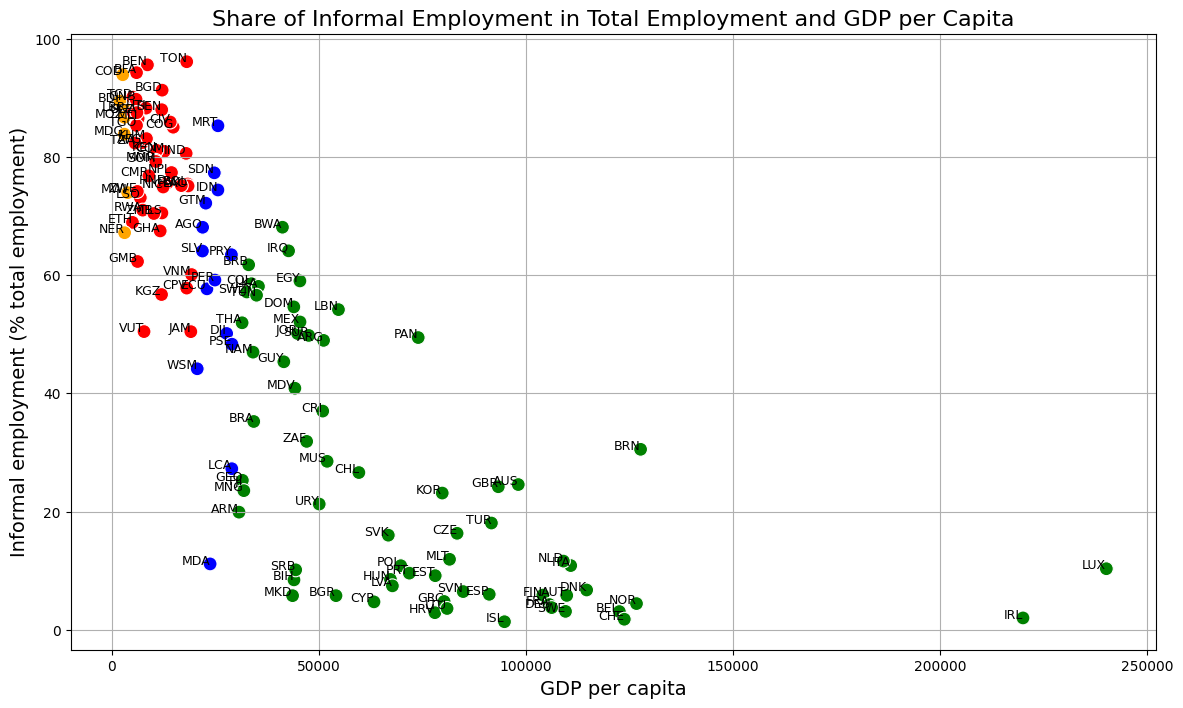

In [51]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


df = data_filtered_renamed.copy()
# Define income levels based on GDP
def income_level(gdp):
    if gdp < 5000:
        return 'Low-income'
    elif gdp < 20000:
        return 'Lower-middle'
    elif gdp < 30000:
        return 'Upper-middle'
    else:
        return 'High-income'

df['Income_level'] = df['GDP'].apply(income_level)

# Define color palette
palette = {
    'Low-income': 'orange',
    'Lower-middle': 'red',
    'Upper-middle': 'blue',
    'High-income': 'green'
}

# Plotting
plt.figure(figsize=(14, 8))

# Scatter plot with seaborn
sns.scatterplot(data=df, x='GDP', y='Informal_employment', hue='Income_level', palette=palette, s=100, legend=False)

# Adding labels and title
plt.title('Share of Informal Employment in Total Employment and GDP per Capita', fontsize=16)
plt.xlabel('GDP per capita', fontsize=14)
plt.ylabel('Informal employment (% total employment)', fontsize=14)

# Adding annotations for each country
for i in range(df.shape[0]):
    plt.text(df['GDP'][i], df['Informal_employment'][i], df['Code_x'][i], fontsize=9, ha='right')

# Show the plot
plt.grid(True)
plt.show()

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

df = data_filtered_renamed.copy()

# Definir niveles de ingreso basados en el PIB
def income_level(gdp):
    if gdp < 10000:
        return 'Low-income'
    elif gdp < 20000:
        return 'Lower-middle'
    elif gdp < 30000:
        return 'Upper-middle'
    else:
        return 'High-income'

df['Income_level'] = df['GDP'].apply(income_level)

# Definir la paleta de colores
palette = {
    'Low-income': 'orange',
    'Lower-middle': 'red',
    'Upper-middle': 'blue',
    'High-income': 'green'
}

# Crear la figura y el eje principal
fig, ax = plt.subplots(figsize=(14, 8))

# Graficar los datos principales
sns.scatterplot(data=df, x='GDP', y='Informal_employment', hue='Income_level', palette=palette, s=100, legend=False, ax=ax)

# Añadir etiquetas y título
ax.set_title('Share of Informal Employment in Total Employment and GDP per Capita', fontsize=16)
ax.set_xlabel('GDP per capita', fontsize=14)
ax.set_ylabel('Informal employment (% total employment)', fontsize=14)

# Añadir anotaciones para cada país
for i in range(df.shape[0]):
    ax.text(df['GDP'][i], df['Informal_employment'][i], df['Code_x'][i], fontsize=9, ha='right')

# Crear un eje inset (insertado)
ax_inset = inset_axes(ax, width="40%", height="40%", loc="upper right")

# Filtrar datos para el zoom
zoom_data = df[(df['GDP'] < 10000) & (df['Informal_employment'] > 70)]

# Graficar los datos en el eje inset
sns.scatterplot(data=zoom_data, x='GDP', y='Informal_employment', hue='Income_level', palette=palette, s=100, legend=False, ax=ax_inset)

# Añadir anotaciones para cada país en el inset
for i in range(zoom_data.shape[0]):
    ax_inset.text(zoom_data['GDP'].iloc[i], zoom_data['Informal_employment'].iloc[i], zoom_data['Code_x'].iloc[i], fontsize=8, ha='right')

# Ajustar los límites del eje inset
ax_inset.set_xlim(0, 10000)
ax_inset.set_ylim(70, 100)
ax_inset.set_title('Zoom on Low-income and High Informal Employment', fontsize=10)

ax.grid(True)
# Mostrar la gráfica
plt.grid(True)
plt.show()


SyntaxError: invalid syntax (3458817943.py, line 62)

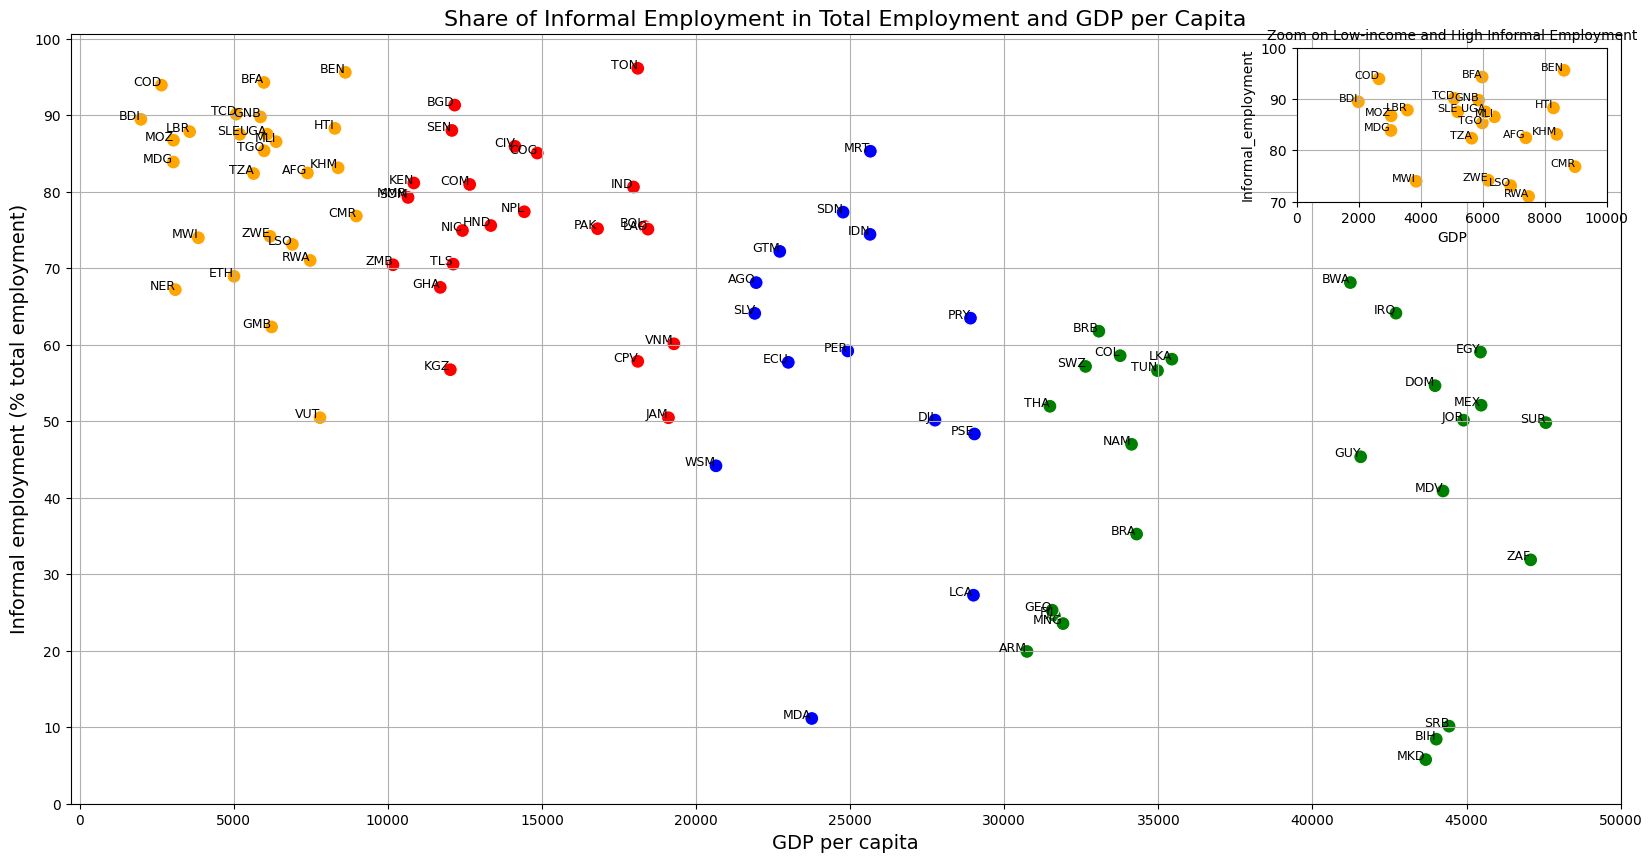

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

df = data_filtered_renamed[data_filtered_renamed.GDP<50001].reset_index(drop=True)

# Definir niveles de ingreso basados en el PIB
def income_level(gdp):
    if gdp < 10000:
        return 'Low-income'
    elif gdp < 20000:
        return 'Lower-middle'
    elif gdp < 30000:
        return 'Upper-middle'
    else:
        return 'High-income'

df['Income_level'] = df['GDP'].apply(income_level)

# Definir la paleta de colores
palette = {
    'Low-income': 'orange',
    'Lower-middle': 'red',
    'Upper-middle': 'blue',
    'High-income': 'green'
}

# Crear la figura y el eje principal
fig, ax = plt.subplots(figsize=(20, 10))

# Graficar los datos principales
sns.scatterplot(data=df, x='GDP', y='Informal_employment', hue='Income_level', palette=palette, s=100, legend=False, ax=ax)

# Añadir etiquetas y título
ax.set_title('Share of Informal Employment in Total Employment and GDP per Capita', fontsize=16)
ax.set_xlabel('GDP per capita', fontsize=14)
ax.set_ylabel('Informal employment (% total employment)', fontsize=14)

# Añadir anotaciones para cada país
for i in range(df.shape[0]):
    ax.text(df['GDP'][i], df['Informal_employment'][i], df['Code_x'][i], fontsize=9, ha='right')

# Crear un eje inset (insertado)
ax_inset = inset_axes(ax, width="40%", height="40%", 
                      bbox_to_anchor=(0.5, 0.5, 0.5, 0.5),  # (x0, y0, width, height)
                      bbox_transform=ax.transAxes, loc="upper right",
                      borderpad=1)  # 

# Filtrar datos para el zoom
zoom_data = df[(df['GDP'] < 10000) & (df['Informal_employment'] > 70)]

# Graficar los datos en el eje inset
sns.scatterplot(data=zoom_data, x='GDP', y='Informal_employment', hue='Income_level', palette=palette, s=100, legend=False, ax=ax_inset)

# Añadir anotaciones para cada país en el inset
for i in range(zoom_data.shape[0]):
    ax_inset.text(zoom_data['GDP'].iloc[i], zoom_data['Informal_employment'].iloc[i], zoom_data['Code_x'].iloc[i], fontsize=8, ha='right')

# Ajustar los límites del eje inset
ax_inset.set_xlim(0, 10000)
ax_inset.set_ylim(70, 100)
ax_inset.set_title('Zoom on Low-income and High Informal Employment', fontsize=10)

ax.set_xticks(range(0, 50001, 5000))
ax.set_yticks(range(0, 101, 10))


# Mostrar la gráfica
ax.grid(True)
plt.grid(True)
plt.show()

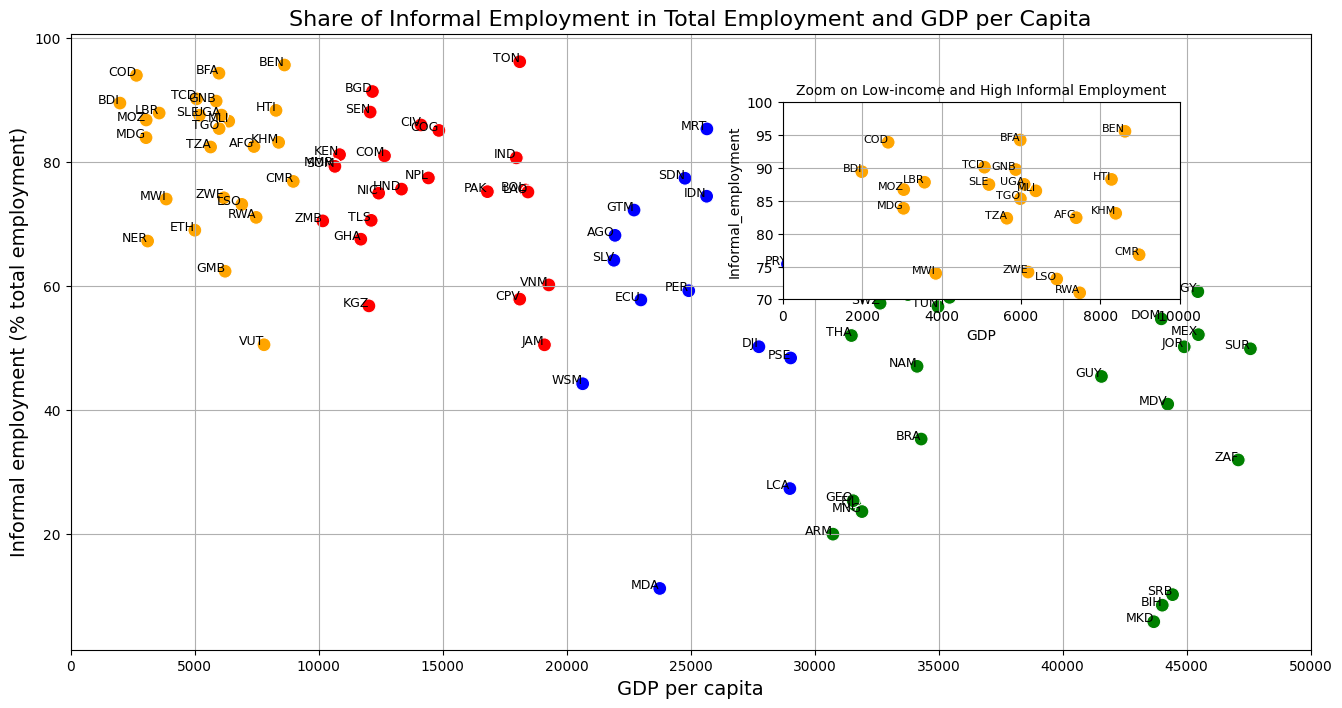

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

df = data_filtered_renamed[data_filtered_renamed.GDP < 50001].reset_index(drop=True)

# Definir niveles de ingreso basados en el PIB
def income_level(gdp):
    if gdp < 10000:
        return 'Low-income'
    elif gdp < 20000:
        return 'Lower-middle'
    elif gdp < 30000:
        return 'Upper-middle'
    else:
        return 'High-income'

df['Income_level'] = df['GDP'].apply(income_level)

# Definir la paleta de colores
palette = {
    'Low-income': 'orange',
    'Lower-middle': 'red',
    'Upper-middle': 'blue',
    'High-income': 'green'
}

# Crear la figura y el eje principal
fig, ax = plt.subplots(figsize=(16, 8))  # Ajuste el tamaño del gráfico principal

# Graficar los datos principales
sns.scatterplot(data=df, x='GDP', y='Informal_employment', hue='Income_level', palette=palette, s=100, legend=False, ax=ax)

# Añadir etiquetas y título
ax.set_title('Share of Informal Employment in Total Employment and GDP per Capita', fontsize=16)
ax.set_xlabel('GDP per capita', fontsize=14)
ax.set_ylabel('Informal employment (% total employment)', fontsize=14)

# Añadir anotaciones para cada país
for i in range(df.shape[0]):
    ax.text(df['GDP'][i], df['Informal_employment'][i], df['Code_x'][i], fontsize=9, ha='right')

# Ajustar los límites del eje x para alargarlo
ax.set_xlim(0, 50000)  # Ajuste los límites según tus necesidades

# Crear un eje inset (insertado)
ax_inset = inset_axes(ax, width="40%", height="40%",
                      bbox_to_anchor=(0.1, 0.1, 0.8, 0.8),  # Ajusta la posición del inset según tus necesidades
                      bbox_transform=ax.transAxes, loc="upper right")

# Filtrar datos para el zoom
zoom_data = df[(df['GDP'] < 10000) & (df['Informal_employment'] > 70)]

# Graficar los datos en el eje inset
sns.scatterplot(data=zoom_data, x='GDP', y='Informal_employment', hue='Income_level', palette=palette, s=100, legend=False, ax=ax_inset)

# Añadir anotaciones para cada país en el inset
for i in range(zoom_data.shape[0]):
    ax_inset.text(zoom_data['GDP'].iloc[i], zoom_data['Informal_employment'].iloc[i], zoom_data['Code_x'].iloc[i], fontsize=8, ha='right')

# Ajustar los límites del eje inset
ax_inset.set_xlim(0, 10000)
ax_inset.set_ylim(70, 100)
ax_inset.set_title('Zoom on Low-income and High Informal Employment', fontsize=10)

# Ajustar las marcas en el eje x del gráfico principal
ax.set_xticks(range(0, 50001, 5000))

# Mostrar la gráfica
ax.grid(True)
plt.grid(True)
plt.show()
